___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Employee Churn Analysis Project***". This is the second project of Capstone Project Series, which you will be able to build your own classification models for a variety of business settings. 

Also you will learn what is Employee Churn?, How it is different from customer churn, Exploratory data analysis and visualization of employee churn dataset using ***matplotlib*** and ***seaborn***, model building and evaluation using python ***scikit-learn*** package. 

You will be able to implement classification techniques in Python. Using Scikit-Learn allowing you to successfully make predictions with the Random Forest, Gradient Descent Boosting , KNN algorithms.

At the end of the project, you will have the opportunity to deploy your model using *Streamlit*.

Before diving into the project, please take a look at the determines and project structure.

- NOTE: This project assumes that you already know the basics of coding in Python and are familiar with model deployement as well as the theory behind K-Means, Gradient Boosting , KNN, Random Forest, and Confusion Matrices. You can try more models and methods beside these to improve your model metrics.



# #Determines
In this project you have HR data of a company. A study is requested from you to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, you have two types of employee one who stayed and another who left the company.

You can describe 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.

First of all, to observe the structure of the data, outliers, missing values and features that affect the target variable, you must use exploratory data analysis and data visualization techniques. 

Then, you must perform data pre-processing operations such as ***Scaling*** and ***Label Encoding*** to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms. you are asked to perform ***Cluster Analysis*** based on the information you obtain during exploratory data analysis and data visualization processes. 

The purpose of clustering analysis is to cluster data with similar characteristics. You are asked to use the ***K-means*** algorithm to make cluster analysis. However, you must provide the K-means algorithm with information about the number of clusters it will make predictions. Also, the data you apply to the K-means algorithm must be scaled. In order to find the optimal number of clusters, you are asked to use the ***Elbow method***. Briefly, try to predict the set to which individuals are related by using K-means and evaluate the estimation results.

Once the data is ready to be applied to the model, you must ***split the data into train and test***. Then build a model to predict whether employees will churn or not. Train your models with your train set, test the success of your model with your test set. 

Try to make your predictions by using the algorithms ***Gradient Boosting Classifier***, ***K Neighbors Classifier***, ***Random Forest Classifier***. You can use the related modules of the ***scikit-learn*** library. You can use scikit-learn ***Confusion Metrics*** module for accuracy calculation. You can use the ***Yellowbrick*** module for model selection and visualization.

In the final step, you will deploy your model using Streamlit tool.



# #Tasks

#### 1. Exploratory Data Analysis
- Importing Modules
- Loading Dataset
- Data Insigts

#### 2. Data Visualization
- Employees Left
- Determine Number of Projects
- Determine Time Spent in Company
- Subplots of Features

#### 3. Data Pre-Processing
- Scaling
- Label Encoding

#### 4. Cluster Analysis
- Find the optimal number of clusters (k) using the elbow method for for K-means.
- Determine the clusters by using K-Means then Evaluate predicted results.

#### 5. Model Building
- Split Data as Train and Test set
- Built Gradient Boosting Classifier, Evaluate Model Performance and Predict Test Data
- Built K Neighbors Classifier and Evaluate Model Performance and Predict Test Data
- Built Random Forest Classifier and Evaluate Model Performance and Predict Test Data

#### 6. Model Deployement

- Save and Export the Model as .pkl
- Save and Export Variables as .pkl 

## 1. Exploratory Data Analysis

Exploratory Data Analysis is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.

### Importing Modules

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
plt.rcParams["figure.figsize"] = (10,8)
import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

Let's first load the required HR dataset using pandas's "read_csv" function.

In [2]:
df = pd.read_csv("HR_Dataset.csv")

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.duplicated().sum()

3008

In [6]:
df.drop_duplicates(inplace=True)

### Data Insights

In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics. Here, you can find the average of both the groups using groupby() and mean() function.

In [7]:
stayed = df[df.left == 0]
stayed

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


In [8]:
stayed.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,10000.0,0.667365,0.217082,0.12,0.54,0.69,0.84,1.0
last_evaluation,10000.0,0.715667,0.161919,0.36,0.58,0.71,0.85,1.0
number_project,10000.0,3.786800,0.981755,2.00,3.00,4.00,4.00,6.0
average_montly_hours,10000.0,198.942700,45.665507,96.00,162.00,198.00,238.00,287.0
time_spend_company,10000.0,3.262000,1.367239,2.00,2.00,3.00,4.00,10.0
Work_accident,10000.0,0.174500,0.379558,0.00,0.00,0.00,0.00,1.0
left,10000.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.0
promotion_last_5years,10000.0,0.019500,0.138281,0.00,0.00,0.00,0.00,1.0


In [9]:
left = df[df.left == 1]
left

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
1995,0.37,0.57,2,147,3,0,1,0,sales,low
1996,0.11,0.92,7,293,4,0,1,0,sales,low
1997,0.41,0.53,2,157,3,0,1,0,sales,low
1998,0.84,0.96,4,247,5,0,1,0,sales,low


In [10]:
left.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,1991.0,0.440271,0.265207,0.09,0.11,0.41,0.73,0.92
last_evaluation,1991.0,0.721783,0.197436,0.45,0.52,0.79,0.91,1.00
number_project,1991.0,3.883476,1.817139,2.00,2.00,4.00,6.00,7.00
average_montly_hours,1991.0,208.162230,61.295145,126.00,146.00,226.00,262.50,310.00
time_spend_company,1991.0,3.881467,0.974041,2.00,3.00,4.00,5.00,6.00
Work_accident,1991.0,0.052737,0.223565,0.00,0.00,0.00,0.00,1.00
left,1991.0,1.000000,0.000000,1.00,1.00,1.00,1.00,1.00
promotion_last_5years,1991.0,0.004018,0.063277,0.00,0.00,0.00,0.00,1.00


## 2. Data Visualization

You can search for answers to the following questions using data visualization methods. Based on these responses, you can develop comments about the factors that cause churn.
- How does the promotion status affect employee churn?
- How does years of experience affect employee churn?
- How does workload affect employee churn?
- How does the salary level affect employee churn?

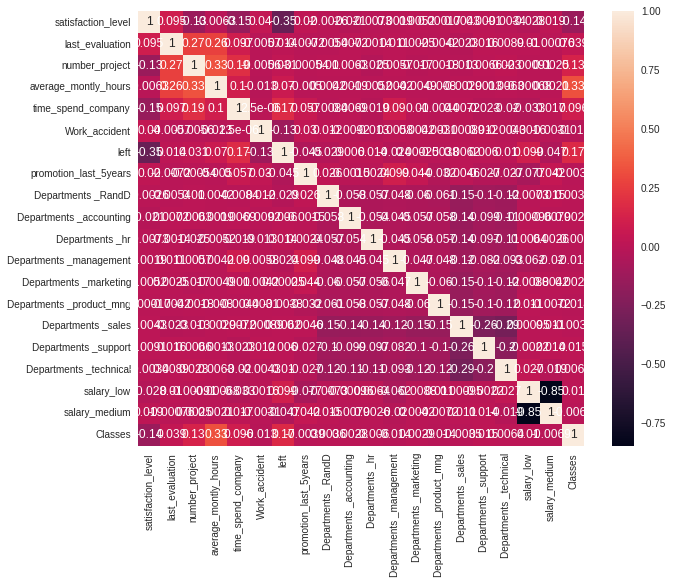

In [141]:
sns.heatmap(df.corr(), annot=True);

### Employees Left

Let's check how many employees were left?
Here, you can plot a bar graph using Matplotlib. The bar graph is suitable for showing discrete variable counts.

In [12]:
pip install --upgrade matplotlib

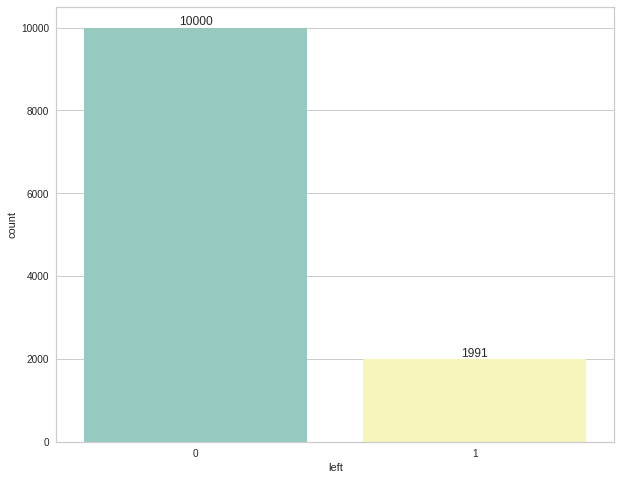

In [142]:
ax = sns.countplot(x=df.left, palette="Set3")
ax.bar_label(ax.containers[0]);

### Number of Projects

Similarly, you can also plot a bar graph to count the number of employees deployed on how many projects?

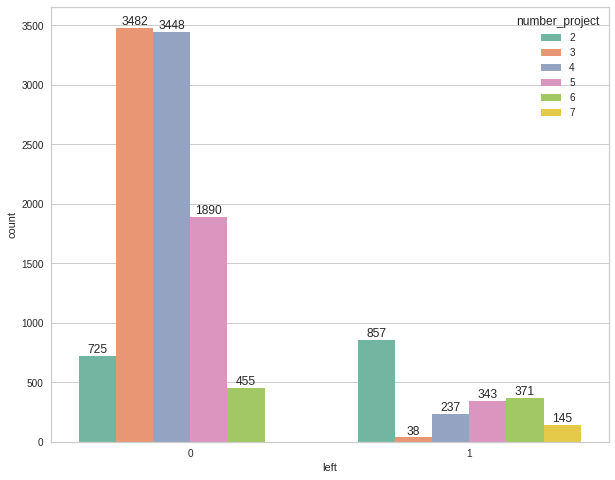

In [143]:
ax = sns.countplot(data = df , x=df.left, hue= "number_project", palette="Set2")
for bars in ax.containers:
        ax.bar_label(bars);

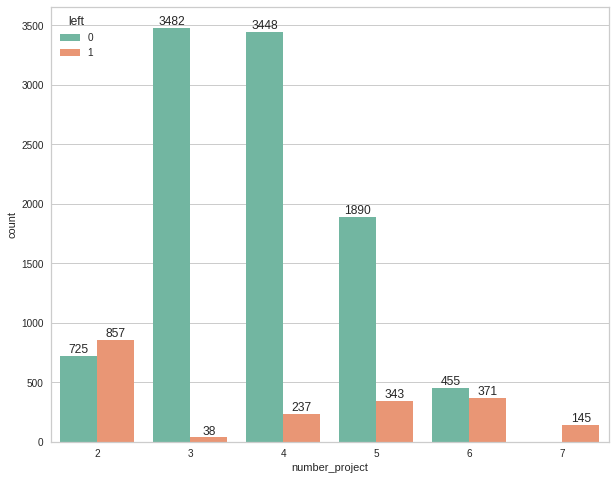

In [144]:
ax = sns.countplot(data = df , x=df.number_project, hue= "left", palette="Set2")
for bars in ax.containers:
        ax.bar_label(bars);

### Time Spent in Company

Similarly, you can also plot a bar graph to count the number of employees have based on how much experience?


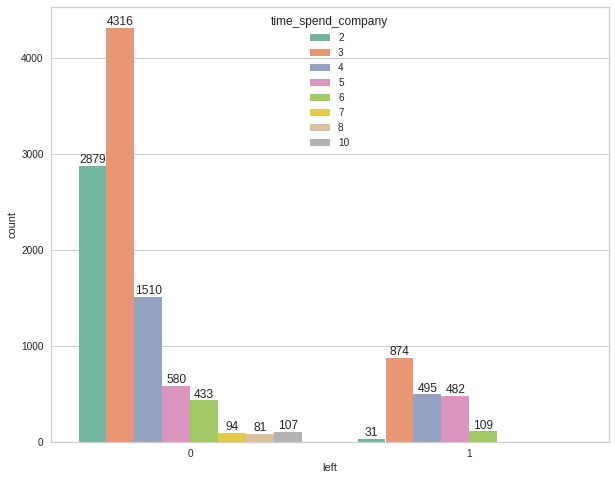

In [145]:
ax = sns.countplot(data = df , x=df.left, hue= "time_spend_company", palette="Set2")
for bars in ax.containers:
        ax.bar_label(bars);

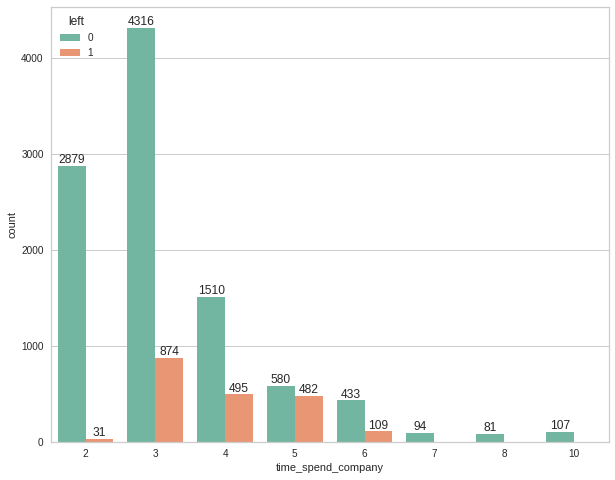

In [146]:
ax = sns.countplot(data = df , x=df.time_spend_company, hue= "left", palette="Set2")
for bars in ax.containers:
        ax.bar_label(bars);

### Subplots of Features

You can use the methods of the matplotlib.

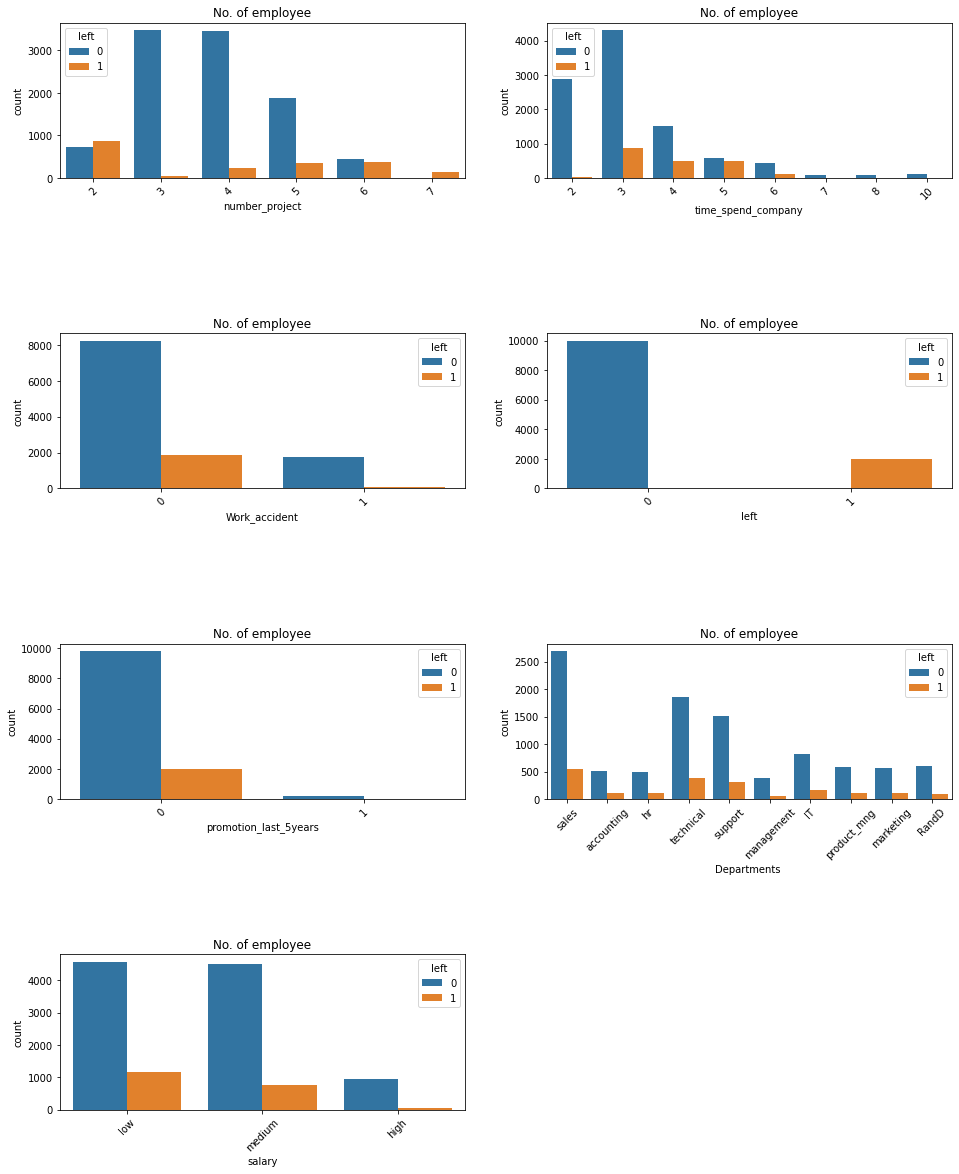

In [18]:
features=['number_project','time_spend_company','Work_accident','left', 'promotion_last_5years','Departments ','salary']
fig=plt.subplots(figsize=(16,20))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = df,hue='left')
    plt.xticks(rotation=45)
    plt.title("No. of employee");

## 3. Data Pre-Processing

#### Scaling

Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it. Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled. Also distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.

Scaling Types:
- Normalization: Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

- Standardization: Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

    

#### Label Encoding

Lots of machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column. In order to encode this data, you could map each value to a number. e.g. Salary column's value can be represented as low:0, medium:1, and high:2. This process is known as label encoding, and sklearn conveniently will do this for you using LabelEncoder.



In [19]:
df_not_dummy = df.copy()  # for deployment

In [20]:
df = pd.get_dummies(df,drop_first=True)

In [21]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments _RandD,Departments _accounting,Departments _hr,Departments _management,Departments _marketing,Departments _product_mng,Departments _sales,Departments _support,Departments _technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


## 4. Cluster Analysis

- Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data mining, and a common technique for statistical data analysis, used in many fields, including pattern recognition, image analysis, information retrieval, bioinformatics, data compression, computer graphics and machine learning.

    [Cluster Analysis](https://en.wikipedia.org/wiki/Cluster_analysis)

    [Cluster Analysis2](https://realpython.com/k-means-clustering-python/)

In [22]:
X = df.drop("left", axis =1) # we didn't scale the data bc our scores are better without scaling.

In [23]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments _RandD,Departments _accounting,Departments _hr,Departments _management,Departments _marketing,Departments _product_mng,Departments _sales,Departments _support,Departments _technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,1,0,0,1,0


In [24]:
from sklearn.cluster import KMeans
K_means_model = KMeans(n_clusters=5, random_state=42)     # n_clusters=8 --> Default

In [25]:
K_means_model.fit_predict(X)

array([0, 4, 4, ..., 2, 0, 0], dtype=int32)

In [26]:
K_means_model.fit(X)

KMeans(n_clusters=5, random_state=42)

In [27]:
df["Classes"] = K_means_model.labels_

In [28]:
df.Classes.value_counts()

0    2715
1    2495
2    2389
4    2263
3    2129
Name: Classes, dtype: int64

In [29]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments _RandD,Departments _accounting,Departments _hr,Departments _management,Departments _marketing,Departments _product_mng,Departments _sales,Departments _support,Departments _technical,salary_low,salary_medium,Classes
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1,4
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1,4
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0


#### The Elbow Method

- "Elbow Method" can be used to find the optimum number of clusters in cluster analysis. The elbow method is used to determine the optimal number of clusters in k-means clustering. The elbow method plots the value of the cost function produced by different values of k. If k increases, average distortion will decrease, each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as k increases. The value of k at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.

    [The Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)

    [The Elbow Method2](https://medium.com/@mudgalvivek2911/machine-learning-clustering-elbow-method-4e8c2b404a5d)

    [KMeans](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1)

Let's find out the groups of employees who left. You can observe that the most important factor for any employee to stay or leave is satisfaction and performance in the company. So let's bunch them in the group of people using cluster analysis.

#### 1. Hopkins Test

In [30]:
pip install pyclustertend

In [31]:
from pyclustertend import hopkins

In [32]:
hopkins(X, X.shape[0])

0.29512887085521305

#### 2. Determine optimal number of clusters

In [33]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)

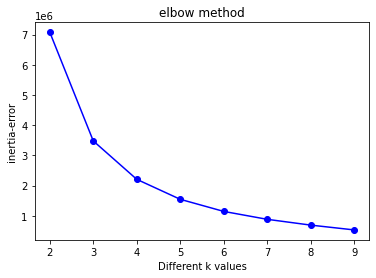

In [34]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method");

In [35]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,3.598261e+06
3,1.271250e+06
4,6.615304e+05
5,4.008214e+05
6,2.618044e+05
7,1.916593e+05
8,1.591863e+05


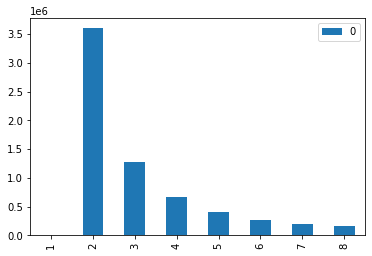

In [36]:
df_diff.plot(kind='bar');

#### 3. YellowBrick

In [37]:
#pip install yellowbrick

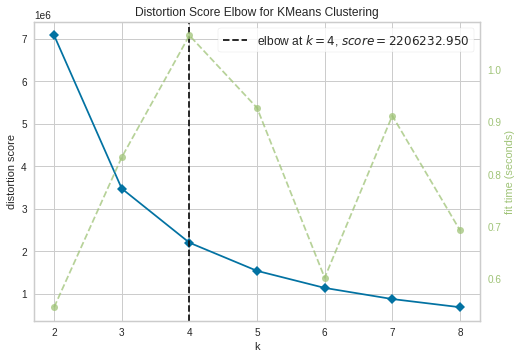

In [38]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();

#### 4. Silhouette Score

In [39]:
from sklearn.metrics import silhouette_score

In [40]:
silhouette_score(X, K_means_model.labels_)

0.5046218513080499

In [41]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.6340158929875183
For n_clusters=3, the silhouette score is 0.5772529479011433
For n_clusters=4, the silhouette score is 0.5352775669597345
For n_clusters=5, the silhouette score is 0.5046218513080499
For n_clusters=6, the silhouette score is 0.49382994953815856
For n_clusters=7, the silhouette score is 0.4995915650010169
For n_clusters=8, the silhouette score is 0.4911837332337048


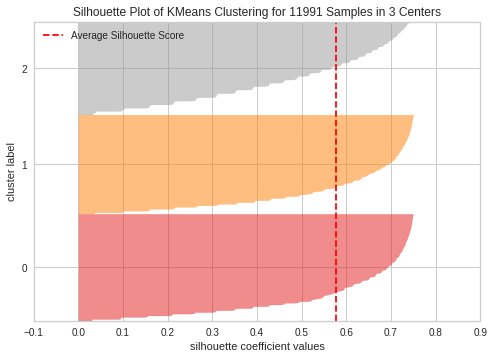

In [42]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=3, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

## 5. Model Building

### Split Data as Train and Test Set

Here, Dataset is broken into two parts in ratio of 70:30. It means 70% data will used for model training and 30% for model testing.

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X = df.drop("left", axis = 1)
y = df["left"]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=101)

### #Gradient Boosting Classifier

In [46]:
from sklearn.metrics import confusion_matrix, classification_report

In [47]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

#### Model Building

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

In [49]:
grad_model = GradientBoostingClassifier(random_state=42)

In [50]:
grad_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

#### Evaluating Model Performance

- Confusion Matrix : You can use scikit-learn metrics module for accuracy calculation. A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

    [Confusion Matrix](https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/)

- Yellowbrick: Yellowbrick is a suite of visualization and diagnostic tools that will enable quicker model selection. It’s a Python package that combines scikit-learn and matplotlib. Some of the more popular visualization tools include model selection, feature visualization, classification and regression visualization

    [Yellowbrick](https://www.analyticsvidhya.com/blog/2018/05/yellowbrick-a-set-of-visualization-tools-to-accelerate-your-model-selection-process/)

In [51]:
eval_metric(grad_model, X_train, y_train, X_test, y_test)

Test_Set
[[2975   26]
 [  46  551]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3001
           1       0.95      0.92      0.94       597

    accuracy                           0.98      3598
   macro avg       0.97      0.96      0.96      3598
weighted avg       0.98      0.98      0.98      3598


Train_Set
[[6960   39]
 [ 100 1294]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6999
           1       0.97      0.93      0.95      1394

    accuracy                           0.98      8393
   macro avg       0.98      0.96      0.97      8393
weighted avg       0.98      0.98      0.98      8393



### Cross Validate for Gradient Boosting

In [52]:
from sklearn.model_selection import cross_val_score, cross_validate

In [53]:
model = GradientBoostingClassifier(random_state=42)

scores = cross_validate(grad_model, X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1', 'roc_auc'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.981651
test_precision    0.965461
test_recall       0.922492
test_f1           0.943372
test_roc_auc      0.984820
dtype: float64

In [54]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score

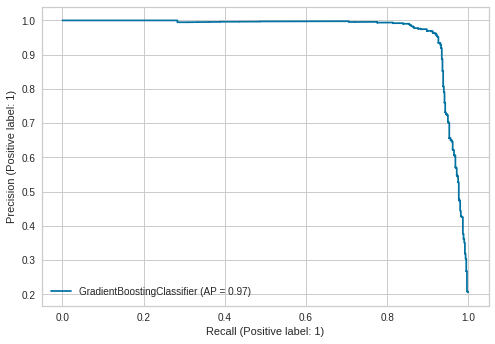

In [55]:
plot_precision_recall_curve(grad_model, X_test, y_test);

### GridSearch for GradientBoosting

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
param_grid = {"n_estimators":[100, 200, 300],
             "subsample":[0.5, 1], "max_features" : [None, 2, 3, 4]} #"learning_rate": [0.001, 0.01, 0.1], 'max_depth':[3,4,5,6]

In [58]:
gb_model = GradientBoostingClassifier(random_state=42)

In [59]:
grid_gb = GridSearchCV(gb_model, param_grid, scoring = "f1", n_jobs = -1).fit(X_train, y_train)

In [60]:
grid_gb.best_params_

{'max_features': None, 'n_estimators': 300, 'subsample': 1}

In [61]:
grid_gb.best_score_

0.9463863607376763

In [62]:
eval_metric(grid_gb, X_train, y_train, X_test, y_test)

Test_Set
[[2976   25]
 [  45  552]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3001
           1       0.96      0.92      0.94       597

    accuracy                           0.98      3598
   macro avg       0.97      0.96      0.96      3598
weighted avg       0.98      0.98      0.98      3598


Train_Set
[[6978   21]
 [  85 1309]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6999
           1       0.98      0.94      0.96      1394

    accuracy                           0.99      8393
   macro avg       0.99      0.97      0.98      8393
weighted avg       0.99      0.99      0.99      8393



#### Prediction

In [63]:
y_pred = grad_model.predict(X_test)   # or grid.predict(X_test) ??

In [64]:
y_pred_proba = grad_model.predict_proba(X_test)

In [65]:
my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}

In [66]:
pd.DataFrame.from_dict(my_dict).sample(10)

,Actual,Pred,Proba_1,Proba_0
6029,0,0,0.016046,0.983954
6355,0,0,0.006644,0.993356
9515,0,0,0.011346,0.988654
6514,0,0,0.009137,0.990863
6956,0,0,0.007247,0.992753
8889,0,0,0.041378,0.958622
6501,0,0,0.052934,0.947066
8858,0,0,0.008226,0.991774
9439,0,0,0.011613,0.988387
416,1,1,0.848895,0.151105


In [67]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

In [68]:
grad_f1 = f1_score(y_test, y_pred)
grad_recall = recall_score(y_test, y_pred)
grad_auc = roc_auc_score(y_test, y_pred)

### Feature Importance

In [69]:
grad_model = GradientBoostingClassifier(random_state=42)
grad_model.fit(X_train, y_train)

grad_model.feature_importances_

feats = pd.DataFrame(index=X.columns, data=grad_model.feature_importances_, columns=['grad_importance'])
grad_imp_feats = feats.sort_values("grad_importance", ascending=False)
grad_imp_feats

,grad_importance
satisfaction_level,0.525286
time_spend_company,0.138343
number_project,0.137138
last_evaluation,0.122045
average_montly_hours,0.074236
Classes,0.001284
salary_low,0.000894
Work_accident,0.000497
Departments _product_mng,0.000083
Departments _management,0.000072


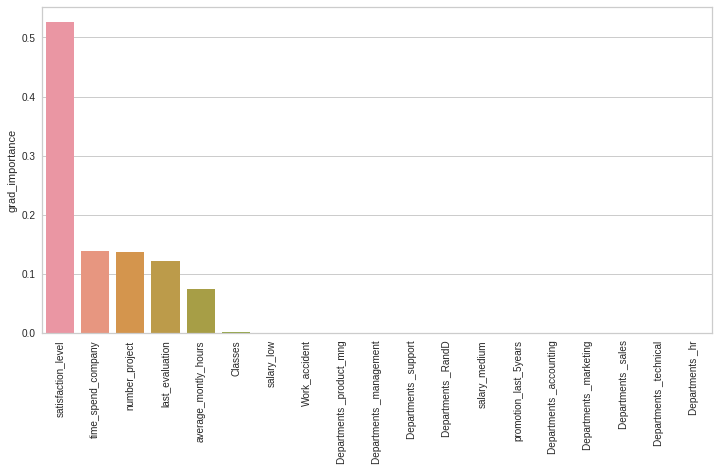

In [70]:
plt.figure(figsize=(12,6))
sns.barplot(data=grad_imp_feats, x=grad_imp_feats.index, y='grad_importance')
plt.xticks(rotation=90);

### #XGBoost Model

In [71]:
from xgboost import XGBClassifier

In [72]:
xgb_model = XGBClassifier(random_state=42)

In [73]:
xgb_model.fit(X_train, y_train)

XGBClassifier(random_state=42)

#### Evaluating Model Performance

In [74]:
eval_metric(xgb_model, X_train, y_train, X_test, y_test)

Test_Set
[[2979   22]
 [  53  544]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3001
           1       0.96      0.91      0.94       597

    accuracy                           0.98      3598
   macro avg       0.97      0.95      0.96      3598
weighted avg       0.98      0.98      0.98      3598


Train_Set
[[6964   35]
 [ 105 1289]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6999
           1       0.97      0.92      0.95      1394

    accuracy                           0.98      8393
   macro avg       0.98      0.96      0.97      8393
weighted avg       0.98      0.98      0.98      8393



#### Cross Validate for XGBoost

In [75]:
model = XGBClassifier(random_state=42)

scores = cross_validate(xgb_model, X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1', 'roc_auc'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.981174
test_precision    0.967546
test_recall       0.917472
test_f1           0.941694
test_roc_auc      0.984060
dtype: float64

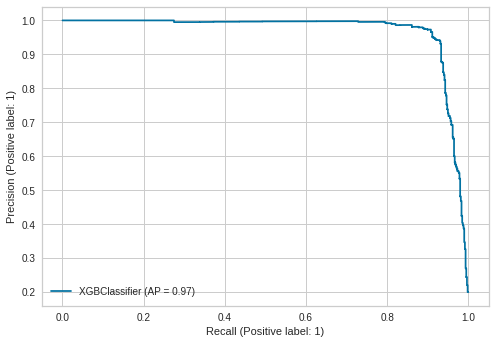

In [76]:
plot_precision_recall_curve(xgb_model, X_test, y_test);

#### GridSearch for XGboost

In [77]:
param_grid = {"n_estimators":[50, 100, 200],'max_depth':[3,4,5], "learning_rate": [0.1, 0.2],
             "subsample":[0.5, 0.8, 1]}

In [78]:
model = XGBClassifier(random_state=42)

In [79]:
xgb_grid = GridSearchCV(model, param_grid, scoring = "f1", n_jobs = -1).fit(X_train, y_train)

In [80]:
xgb_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}

In [81]:
xgb_grid.best_score_

0.9489315492363894

In [82]:
eval_metric(xgb_grid, X_train, y_train, X_test, y_test)

Test_Set
[[2982   19]
 [  51  546]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3001
           1       0.97      0.91      0.94       597

    accuracy                           0.98      3598
   macro avg       0.97      0.95      0.96      3598
weighted avg       0.98      0.98      0.98      3598


Train_Set
[[6977   22]
 [  93 1301]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6999
           1       0.98      0.93      0.96      1394

    accuracy                           0.99      8393
   macro avg       0.99      0.97      0.97      8393
weighted avg       0.99      0.99      0.99      8393



#### Prediction

In [83]:
y_pred = xgb_model.predict(X_test)
y_pred

array([0, 0, 1, ..., 1, 0, 0])

In [84]:
y_pred_proba = xgb_model.predict_proba(X_test)

In [85]:
my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}

In [86]:
pd.DataFrame.from_dict(my_dict).sample(10)

,Actual,Pred,Proba_1,Proba_0
7578,0,0,0.007983,0.992017
308,1,1,0.927584,0.072416
10765,0,0,0.026536,0.973464
8336,0,0,0.008058,0.991942
1544,1,1,0.773297,0.226703
9705,0,0,0.008380,0.991620
719,1,1,0.958716,0.041284
5897,0,0,0.025029,0.974971
4555,0,0,0.002193,0.997807
3264,0,0,0.007426,0.992574


In [87]:
xgb_f1 = f1_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_pred)

#### Feature Importance

In [88]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

xgb_model.feature_importances_

feats = pd.DataFrame(index=X.columns, data=xgb_model.feature_importances_, columns=['xgb_importance'])
xgb_imp_feats = feats.sort_values("xgb_importance", ascending=False)
xgb_imp_feats

,xgb_importance
satisfaction_level,0.294564
time_spend_company,0.192839
number_project,0.151092
last_evaluation,0.132336
Classes,0.087937
average_montly_hours,0.074061
Work_accident,0.034459
salary_low,0.030303
Departments _technical,0.001617
Departments _sales,0.000792


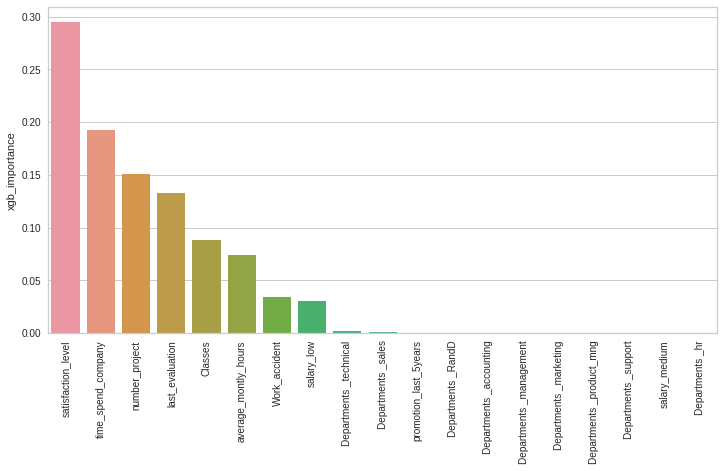

In [89]:
plt.figure(figsize=(12,6))
sns.barplot(data=xgb_imp_feats, x=xgb_imp_feats.index, y='xgb_importance')
plt.xticks(rotation=90);

### Random Forest Classifier

#### Model Building

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
rf_model = RandomForestClassifier(random_state=42)

In [92]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

#### Evaluating Model Performance

In [93]:
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[2995    6]
 [  59  538]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3001
           1       0.99      0.90      0.94       597

    accuracy                           0.98      3598
   macro avg       0.98      0.95      0.97      3598
weighted avg       0.98      0.98      0.98      3598


Train_Set
[[6999    0]
 [   0 1394]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6999
           1       1.00      1.00      1.00      1394

    accuracy                           1.00      8393
   macro avg       1.00      1.00      1.00      8393
weighted avg       1.00      1.00      1.00      8393



#### Cross Validate for Random Forest

In [94]:
model = RandomForestClassifier(random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1', 'roc_auc'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.982247
test_precision    0.984544
test_recall       0.907431
test_f1           0.944245
test_roc_auc      0.980186
dtype: float64

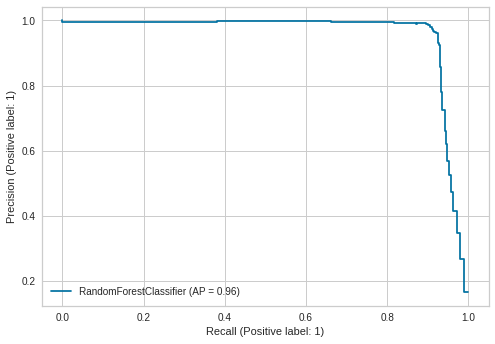

In [95]:
plot_precision_recall_curve(rf_model, X_test, y_test);

#### GridSearch for Random Forest

In [96]:
param_grid = {'n_estimators':[50, 64, 100, 128, 300],   # Araştırmalara göre 64 ve 128 sayıları mutlaka denenmeli 
             'max_features':[2, 3, 4, "auto"],
             'max_depth':[3, 5, 7, 9],
             'min_samples_split':[2, 5, 8]}

In [97]:
model = RandomForestClassifier(class_weight = "balanced", random_state=42)
rf_grid = GridSearchCV(model, param_grid, scoring = "recall", n_jobs = -1).fit(X_train, y_train)

In [98]:
rf_grid.best_params_

{'max_depth': 5,
 'max_features': 4,
 'min_samples_split': 8,
 'n_estimators': 128}

In [99]:
rf_grid.best_score_

0.9268198344550168

In [100]:
eval_metric(rf_grid, X_train, y_train, X_test, y_test)

Test_Set
[[2910   91]
 [  53  544]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      3001
           1       0.86      0.91      0.88       597

    accuracy                           0.96      3598
   macro avg       0.92      0.94      0.93      3598
weighted avg       0.96      0.96      0.96      3598


Train_Set
[[6799  200]
 [  96 1298]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      6999
           1       0.87      0.93      0.90      1394

    accuracy                           0.96      8393
   macro avg       0.93      0.95      0.94      8393
weighted avg       0.97      0.96      0.97      8393



#### Prediction

In [101]:
y_pred = rf_model.predict(X_test)

In [102]:
y_pred_proba = rf_model.predict_proba(X_test)

In [103]:
my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}

In [104]:
pd.DataFrame.from_dict(my_dict).sample(10)

,Actual,Pred,Proba_1,Proba_0
3014,0,0,0.00,1.00
4023,0,0,0.07,0.93
3530,0,0,0.00,1.00
2757,0,0,0.00,1.00
5454,0,0,0.04,0.96
1023,1,1,0.99,0.01
8101,0,0,0.00,1.00
11796,0,0,0.00,1.00
2444,0,0,0.00,1.00
6903,0,0,0.01,0.99


In [105]:
rf_f1 = f1_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_auc = roc_auc_score(y_test, y_pred)

#### Feature Importance for RF

In [106]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

rf_model.feature_importances_

feats = pd.DataFrame(index=X.columns, data=rf_model.feature_importances_, columns=['rf_importance'])
rf_imp_feats = feats.sort_values("rf_importance", ascending=False)
rf_imp_feats

,rf_importance
satisfaction_level,0.312808
number_project,0.175468
time_spend_company,0.153685
average_montly_hours,0.152160
last_evaluation,0.124032
Classes,0.038606
Work_accident,0.008694
salary_low,0.006857
salary_medium,0.004648
Departments _technical,0.003741


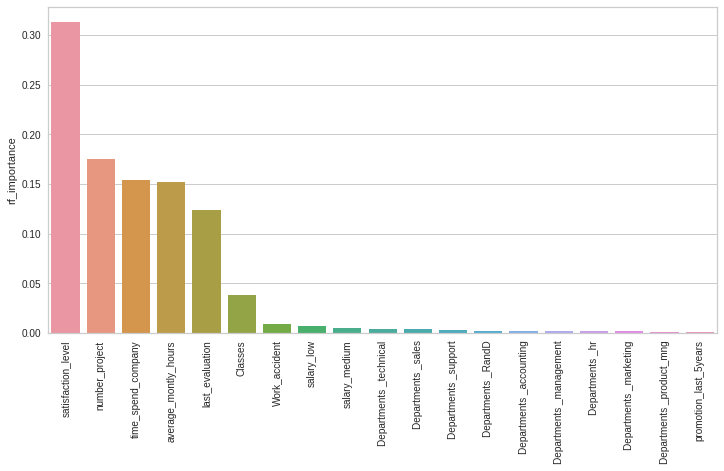

In [107]:
plt.figure(figsize=(12,6))
sns.barplot(data=rf_imp_feats, x=rf_imp_feats.index, y='rf_importance')
plt.xticks(rotation=90);

### KNeighbors Classifier

#### Model Building

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=101)

In [109]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [110]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [111]:
from sklearn.neighbors import KNeighborsClassifier

In [112]:
knn_model = KNeighborsClassifier(n_neighbors=5)  # n_neighbors=5 --> Default

In [113]:
knn_model.fit(X_train_scaled,y_train)

KNeighborsClassifier()

#### Evaluating Model Performance

In [114]:
eval_metric(knn_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[2876  125]
 [ 104  493]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      3001
           1       0.80      0.83      0.81       597

    accuracy                           0.94      3598
   macro avg       0.88      0.89      0.89      3598
weighted avg       0.94      0.94      0.94      3598


Train_Set
[[6821  178]
 [ 177 1217]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      6999
           1       0.87      0.87      0.87      1394

    accuracy                           0.96      8393
   macro avg       0.92      0.92      0.92      8393
weighted avg       0.96      0.96      0.96      8393



#### Cross Validate for KNN

In [115]:
model = KNeighborsClassifier()   # Her yeni islemde modeli sifirlamayi unutma!

scores = cross_validate(knn_model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.938638
test_precision    0.808842
test_recall       0.827055
test_f1           0.817347
dtype: float64

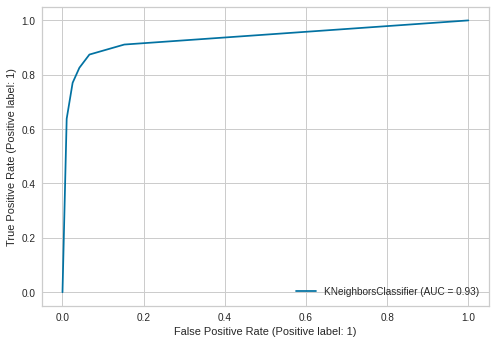

In [116]:
plot_roc_curve(knn_model, X_test_scaled, y_test);

#### GridSearch for KNN

In [117]:
knn_grid = KNeighborsClassifier()

In [118]:
k_values= range(1,30)

In [119]:
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}

In [120]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'accuracy') 

In [121]:
knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [122]:
knn_grid_model.best_params_

{'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}

In [123]:
knn_grid_model.best_score_

0.9560331176570747

KNN grid model sonuçları daha iyi, onu seçtik :

In [124]:
eval_metric(knn_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[2936   65]
 [ 108  489]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3001
           1       0.88      0.82      0.85       597

    accuracy                           0.95      3598
   macro avg       0.92      0.90      0.91      3598
weighted avg       0.95      0.95      0.95      3598


Train_Set
[[6999    0]
 [ 167 1227]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6999
           1       1.00      0.88      0.94      1394

    accuracy                           0.98      8393
   macro avg       0.99      0.94      0.96      8393
weighted avg       0.98      0.98      0.98      8393



#### Prediction

In [125]:
y_pred = knn_grid_model.predict(X_test_scaled)

In [126]:
y_pred_proba = knn_grid_model.predict_proba(X_test_scaled)

In [127]:
my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}

In [128]:
pd.DataFrame.from_dict(my_dict).sample(10)

,Actual,Pred,Proba_1,Proba_0
2643,0,0,0.0,1.0
6642,0,0,0.0,1.0
1825,1,1,1.0,0.0
5193,0,0,0.0,1.0
9175,0,1,1.0,0.0
8658,0,0,0.0,1.0
4330,0,0,0.0,1.0
7961,0,0,0.0,1.0
4883,0,0,0.0,1.0
1185,1,1,1.0,0.0


In [129]:
knn_f1 = f1_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_auc = roc_auc_score(y_test, y_pred)

### Comparing Models

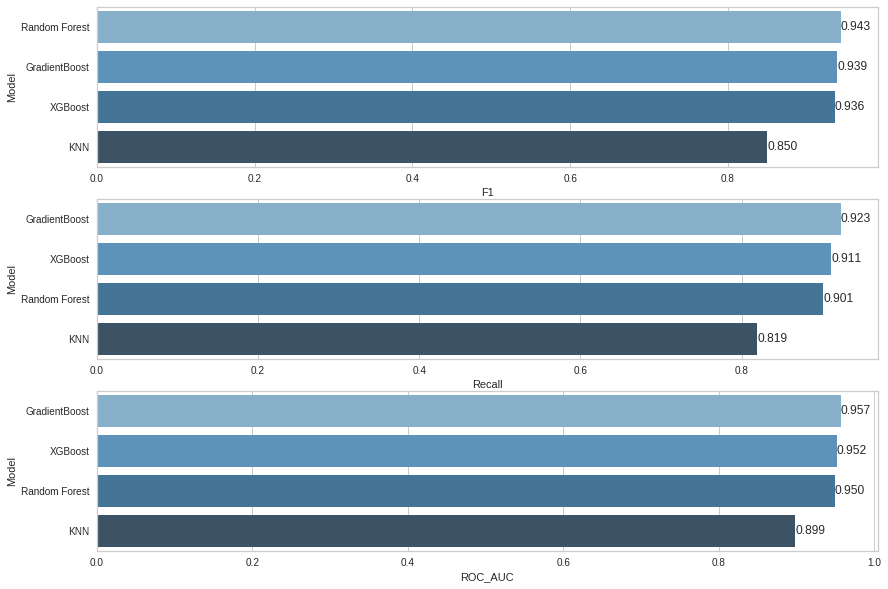

In [130]:
compare = pd.DataFrame({"Model": ["KNN", "Random Forest",
                                 "GradientBoost", "XGBoost"],
                        "F1": [knn_f1, rf_f1, grad_f1, xgb_f1],
                        "Recall": [knn_recall, rf_recall, grad_recall, xgb_recall],
                        "ROC_AUC": [knn_auc, rf_auc, grad_auc, xgb_auc]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

## 6. Model Deployement

You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied. Streamlit is a popular open source framework used by data scientists for model distribution.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to new .py file and create your web app with Streamlit.

### Save and Export the Model as .pkl

In [131]:
import pickle 

In [132]:
pickle_out = open("KNeighborsClassifier.pkl", "wb")
pickle.dump(knn_grid_model, pickle_out)
pickle_out.close()

In [133]:
pickle_out = open("RandomForestClassifier.pkl", "wb")
pickle.dump(rf_model, pickle_out)
pickle_out.close()

In [134]:
pickle_out = open("XGBClassifier.pkl", "wb")
pickle.dump(xgb_model, pickle_out)
pickle_out.close()

In [135]:
pickle_out = open("GradientBoostingClassifier.pkl", "wb")
pickle.dump(grad_model, pickle_out)
pickle_out.close()

In [136]:
scaler=StandardScaler() 
X_train_scaled=scaler.fit(X_train)
pickle.dump(X_train_scaled, open("my_scaler_knn.pkl", 'wb'))

### Save and Export Variables as .pkl

In [137]:
columns=X.columns
pickle.dump(columns, open("my_columns.pkl", 'wb'))   # with get_dummy

In [138]:
df_not_dummy.drop('left', axis = 1).columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

In [139]:
columns_not_dummy=df_not_dummy.drop('left', axis = 1).columns
pickle.dump(columns_not_dummy, open("not_dummy_columns.pkl", 'wb'))   # without get_dummy

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___